# PCA with SVD step by step
## First: understand what is PCA
Key ideas: build a new coordiante system for our data with principal components
What a coordinate systems stands for our data? Image we have a set of dogs(big type) with following features: age(year), speed(km/h), weight(kg). We have a matrix of dogs as the collumns and  features as rows



In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 原始数据矩阵 (3个特征 x 10只犬)
dogs = np.array([
    [2.5, 4.0, 1.0, 5.5, 3.0, 6.0, 2.0, 4.5, 3.5, 7.0],    # 年龄（年）
    [12.1, 11.8, 10.5, 13.0, 11.3, 10.9, 12.5, 11.0, 12.8, 10.0],  # 速度（km/h）
    [28.3, 31.2, 25.7, 33.1, 29.8, 34.0, 27.5, 32.4, 30.1, 35.2]   # 体重（kg）
])



## Center the data by calculate the mean of each axis

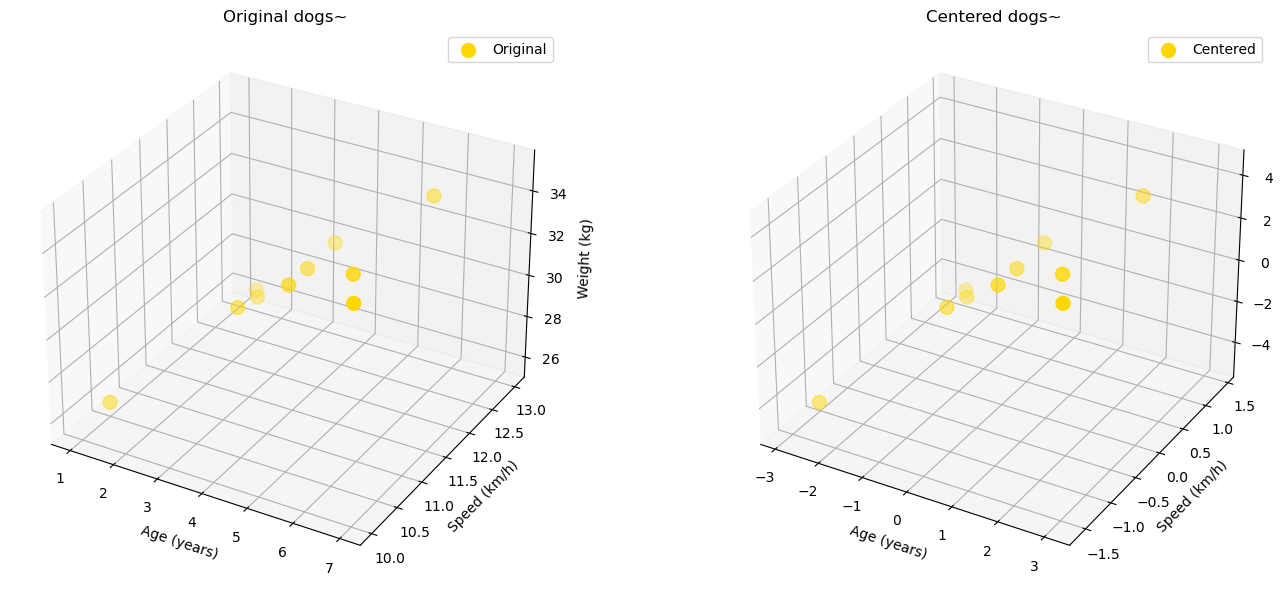

In [47]:
x_axis = dogs[0].mean()
y_axis = dogs[1].mean()
z_axis = dogs[2].mean()
centre = np.array([[x_axis],[y_axis],[z_axis]])
centred_dogs = dogs - centre

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121,projection='3d') # first argument: subplot frid layout and position
ax1.scatter(dogs[0],dogs[1],dogs[2],c="gold",s=100,label='Original')
ax1.set_title('Original dogs~')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Speed (km/h)')
ax1.set_zlabel('Weight (kg)')
ax1.legend()

ax2 = fig.add_subplot(122,projection='3d')
ax2.scatter(centred_dogs[0],centred_dogs[1],centred_dogs[2],c="gold",s=100,label='Centered')
ax2.set_title('Centered dogs~')
ax2.set_xlabel('Age (years)')
ax2.set_ylabel('Speed (km/h)')
ax2.set_zlabel('Weight (kg)')
ax2.legend()


plt.tight_layout()
plt.show()

## Calculate the covariance Matrix
This matrix shows the direction of each feature and helps us to calculate their linear combinaison to find the max variation which stands for the eigenvalue (get the eigenvector which has less covariance with original features, contains more information). 

Covariance Matrix:
[[ 3.54444444 -0.44        5.64222222]
 [-0.44        1.02322222 -0.67744444]
 [ 5.64222222 -0.67744444  9.13344444]]


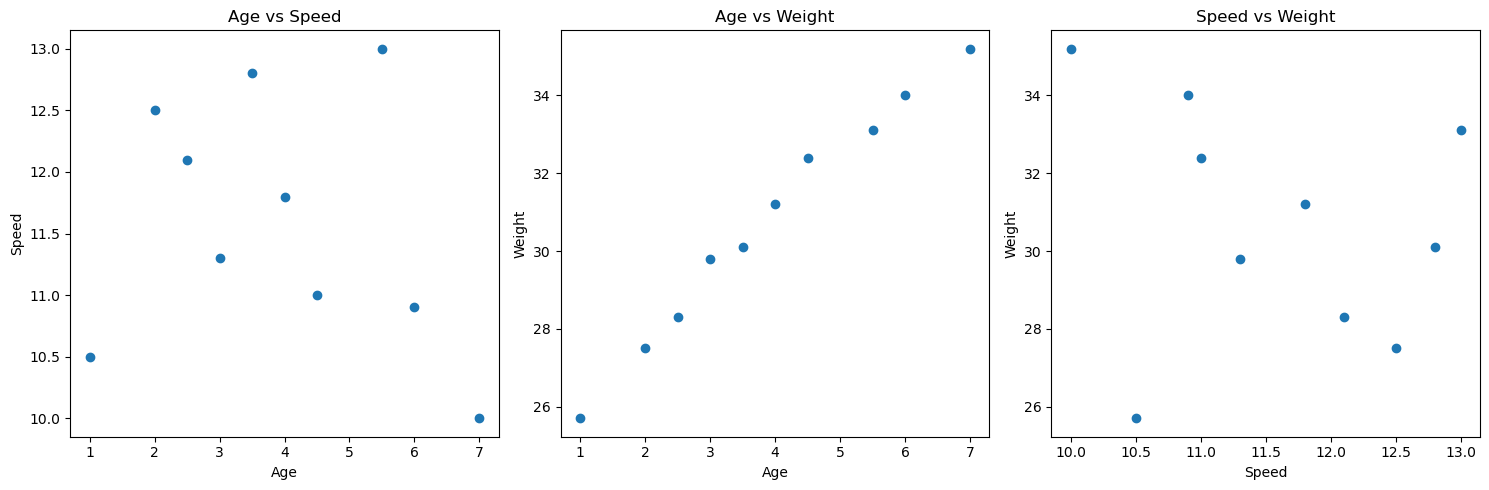

In [50]:
# Calculate and visualize covariance
cov_matrix = np.cov(centred_dogs)

print("Covariance Matrix:")
print(cov_matrix)

# Visualize correlations between features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Age vs Speed
axes[0].scatter(dogs[0], dogs[1])
axes[0].set_title('Age vs Speed')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Speed')

# Age vs Weight
axes[1].scatter(dogs[0], dogs[2])
axes[1].set_title('Age vs Weight')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Weight')

# Speed vs Weight
axes[2].scatter(dogs[1], dogs[2])
axes[2].set_title('Speed vs Weight')
axes[2].set_xlabel('Speed')
axes[2].set_ylabel('Weight')

plt.tight_layout()
plt.show()

## The data is not normalized
### Still calculate the eigencevalue

Eigenvalues:
[12.69118628  0.96761755  0.04230728]

Proportion of variance explained:
[0.92628884 0.07062329 0.00308787]


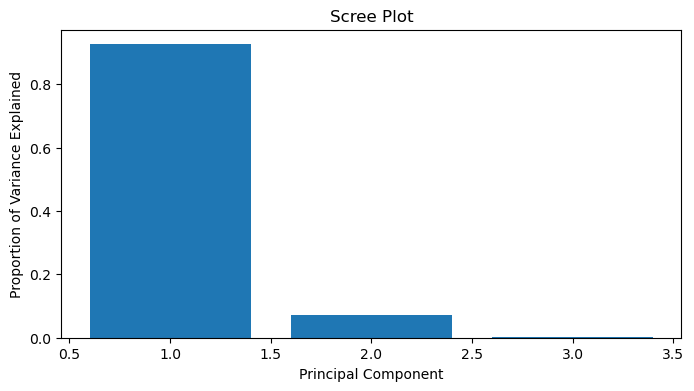

In [52]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
# Print results
print("Eigenvalues:")
print(eigenvalues)
print("\nProportion of variance explained:")
print(eigenvalues / np.sum(eigenvalues))

# Visualize the explained variance ratio
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues / np.sum(eigenvalues))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

## Select top2 eigenvalues here and use SVD for data projection

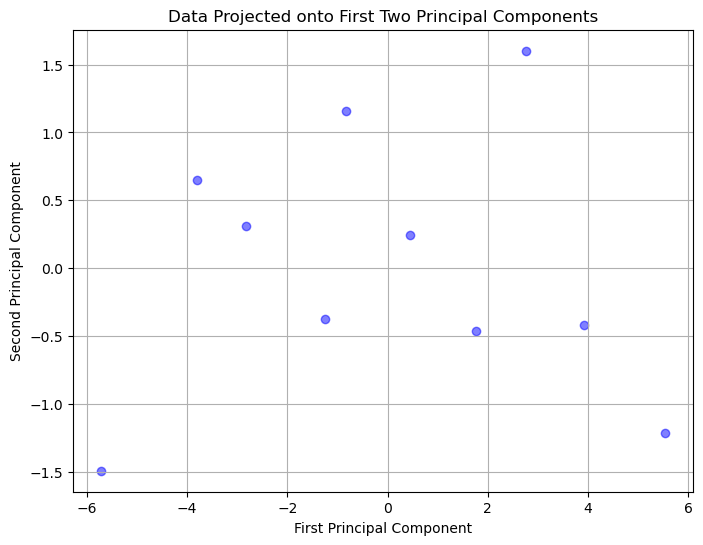

Variance explained by first two components: 99.6912127444111 %


In [54]:
# Select top 2 eigenvectors
top2_eigenvectors = eigenvectors[:, :2]

# Project the centered data onto the top 2 principal components
projected_data = np.dot(top2_eigenvectors.T, centred_dogs)

# Visualize the projected 2D data
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[0], projected_data[1], c='blue', alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Data Projected onto First Two Principal Components')
plt.grid(True)
plt.show()

# Print the explained variance ratio for these two components
print("Variance explained by first two components:", 
      (eigenvalues[:2] / np.sum(eigenvalues)).sum() * 100, "%")